In [52]:
import pandas as pd
import numpy as np
import requests
import requests_cache
import pandas as pd
import time
import numpy as np
import json
import time
from plotnine import * 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk
import nltk.corpus as corpus
from scipy.stats import linregress

# Part 2

### Problems
* What topic of video do people like the most? (Does the most popular topic changes in different month?) (Try to analyze the tags of the videos)
* Are tags helping a video to be trending and getting views? (Do category of the video and the tags matches/relevant?)
* Do tags and popular video topic relate to the news on that time?
(For example: popular topic of video for july was donald trump, then find out what donald trump did on july )


In [32]:
data = pd.read_csv('/Users/zhanhaochen/project-miners/youtube-new/USvideos.csv')
data.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


### US_category_id.json has all available categories decided by the Youtube.

In [33]:
us_videos_categories = pd.read_json('/Users/zhanhaochen/project-miners/youtube-new/US_category_id.json')
categories = {int(category['id']): category['snippet']['title'] for category in us_videos_categories['items']}
categories

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

### Using word cloud to represent the trending topics.

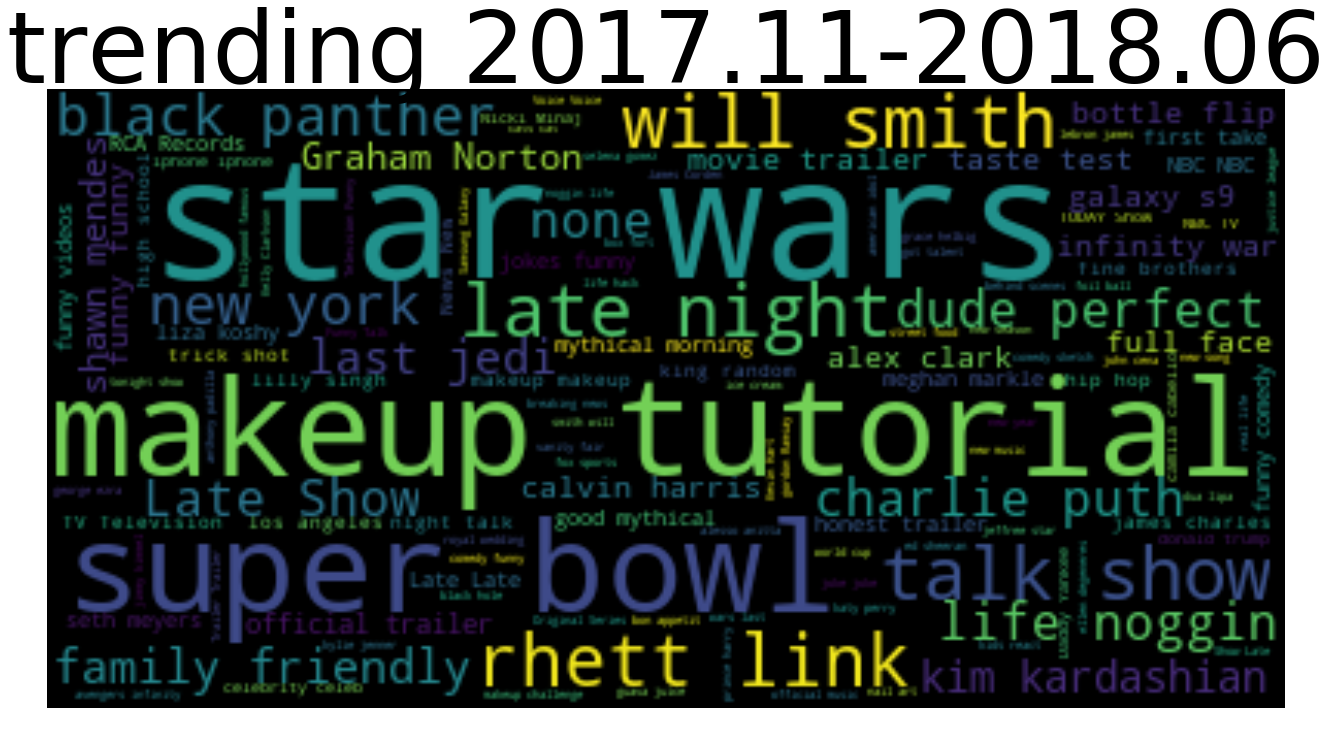

In [474]:

text = data['tags']
text = text.str.cat(sep = ' ')
wordcloud = WordCloud(stopwords = stopwords, max_words = 5000, background_color="black").generate(text)

# Display the generated image:
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Trending 2017.11-2018.06", size = 100)
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()






In [680]:
wordcloud.to_file("/Users/zhanhaochen/Downloads/first_review.png")

### Relation between views and tag number applied.

Add tag number columns for data. Note that 

In [46]:
data['tag numbers'] = [len(data['tags'][i].split('|')) for i in range(len(data))]

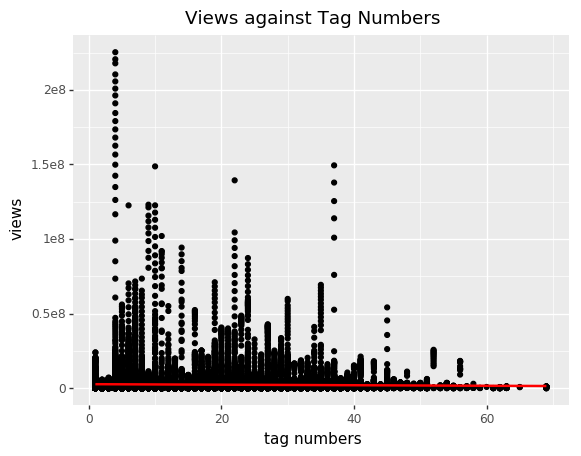

<ggplot: (-9223372029303239350)>

In [57]:

p1 = (
ggplot(data, aes(x = 'tag numbers', y = 'views'))
 + geom_point(color = 'black')
 + labs(title = 'Views against Tag Numbers')
 + geom_smooth(method='lm', color = 'red')
)
p1


In [54]:
a = data['tag numbers']
b = data['views']
print(linregress(a, b))

LinregressResult(slope=-17818.970556249573, intercept=2712465.7313502515, rvalue=-0.028948865599400037, pvalue=4.653804057865687e-09, stderr=3040.59069640554)


In [88]:
ggsave(plot = p1, path = "/Users/zhanhaochen/project-miners/category plots",res = 100)

/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: /Users/zhanhaochen/project-miners/category plots/plotnine-save-9223372029303239350.pdf
  warn('Filename: {}'.format(filename))


### Between tags and categories.

In [90]:
data['trending month'] = data['trending_date'].str.rsplit('.', n = 1, expand = True)[1]
data['trending year'] = data['trending_date'].str.split('.', n = 1, expand = True)[0]

In [91]:
def get_month(year):
    datayear = data[data['trending year'] == year]
    month = np.unique(datayear['trending month'])
    return month

In [92]:
get_month('18')

array(['01', '02', '03', '04', '05', '06'], dtype=object)

In [93]:
def get_monthtrend(month, year):
    """
    This function takes 17 or 18 as year number and 01 - 12 as month number.
    It returns the top 20 tags of each month.
    """
    datayear = data[data['trending year'] == year]
    datamonth = datayear[datayear['trending month'] == month]
    text = datamonth['tags'].str.cat(sep = ' ')
    word = nltk.word_tokenize(text)
    stopword = corpus.stopwords.words('english') + ['video', 'new', '2017', '2018', 'youtube', 'videos']
    words = [x.lower() for x in word if x.lower() not in stopword]
    fd = nltk.FreqDist(w for w in words if w.isalnum())
    m = fd.most_common(20)
    m = m1117 = pd.DataFrame(m)
    m.columns = ['tags', 'frequency']
    return m
    

#### Get 20 tags that are the most trending ones with their frequency.

In [94]:
m1117 = get_monthtrend('11', '17')
m1217 = get_monthtrend('12', '17')
m0118 = get_monthtrend('01', '18')
m0218 = get_monthtrend('02', '18')
m0318 = get_monthtrend('03', '18')
m0418 = get_monthtrend('04', '18')
m0518 = get_monthtrend('05', '18')
m0618 = get_monthtrend('06', '18')

In [95]:
def get_mosttags(m):
    return m['tags'].str.cat(sep = ', ')


In [575]:
print(get_mosttags(m1117))

print(get_mosttags(m1217))

print(get_mosttags(m0118))

print(get_mosttags(m0218))

print(get_mosttags(m0318))

print(get_mosttags(m0418))

print(get_mosttags(m0518))

print(get_mosttags(m0618))

funny, iphone, show, music, news, comedy, x, makeup, movie, black, review, live, christmas, best, late, justice, season, tutorial, official, american
christmas, news, funny, star, music, show, wars, comedy, makeup, live, food, last, jedi, best, movie, trailer, review, interview, official, diy
news, funny, makeup, best, show, comedy, music, food, movie, life, trailer, school, live, review, star, official, dog, none, game, tv
super, bowl, news, funny, show, music, food, comedy, black, game, trailer, movie, olympics, makeup, star, official, live, day, commercial, tv
makeup, funny, food, music, movie, trailer, best, challenge, comedy, tutorial, show, s9, cake, galaxy, review, test, interview, cat, beauty, news
makeup, music, funny, show, trailer, news, movie, food, comedy, challenge, best, official, tv, beauty, vs, late, review, ball, tutorial, foil
makeup, funny, music, black, challenge, food, comedy, iphone, show, trailer, news, live, official, movie, vs, wedding, best, game, google, pop

## Tags of month

    2017/11
* funny, iphone, show, music, news, comedy, x, makeup, movie, black, review, live, christmas, best, late, justice, season, tutorial, official, american

    2017/12
* christmas, news, funny, star, music, show, wars, comedy, makeup, live, food, last, jedi, best, movie, trailer, review, interview, official, diy

    2018/01
* news, funny, makeup, best, show, comedy, music, food, movie, life, trailer, school, live, review, star, official, dog, none, game, tv

    2018/02
* super, bowl, news, funny, show, music, food, comedy, black, game, trailer, movie, olympics, makeup, star, official, live, day, commercial, tv

    2018/03
* makeup, funny, food, music, movie, trailer, best, challenge, comedy, tutorial, show, s9, cake, galaxy, review, test, interview, cat, beauty, news

    2018/04
* makeup, music, funny, show, trailer, news, movie, food, comedy, challenge, best, official, tv, beauty, vs, late, review, ball, tutorial, foil

    2018/05
* makeup, funny, music, black, challenge, food, comedy, iphone, show, trailer, news, live, official, movie, vs, wedding, best, game, google, pop

    2018/06
* makeup, funny, music, trailer, black, challenge, show, live, game, pop, fortnite, official, comedy, diy, room, best, food, family, smith, season

# Problem 2

In [97]:
# Add category column into data
data['category'] = [categories[x] for x in data['category_id']]

In [98]:
data['trending_month_year'] = data['trending_date'].str.split('.', expand = True)[0] + '.' + data['trending_date'].str.split('.', expand = True)[2]




In [99]:

def get_category(year_month):
    """Getting the category for each month.
    """
    ym = data[data['trending_month_year'] == year_month]
    return ym
    
    

In [100]:
c1117 = get_category('17.11')
c1217 = get_category('17.12')
c0118 = get_category('18.01')
c0218 = get_category('18.02')
c0318 = get_category('18.03')
c0418 = get_category('18.04')
c0518 = get_category('18.05')
c0618 = get_category('18.06')

In [112]:
def plot_cat(table, title):
    return (
        ggplot(table,aes(x = 'category'))
        + geom_bar(color = "blue", fill = "white")
        + theme(axis_text_x = element_text(angle = 45, hjust = 1))
        + labs(title = title)
        + ylim(0, 2000)
    )

def ggplot_path(p):
    ggsave(plot = p, path = "/Users/zhanhaochen/project-miners/category plots", width = 6.4, height = 4.8, units = 'in')

## Saving the category bar plots for each month.

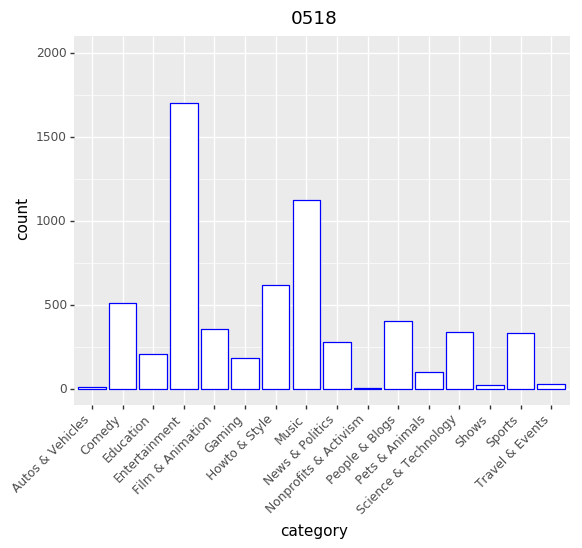

<ggplot: (7553866865)>

In [115]:
p = plot_cat(c0518, '0518')
p

In [84]:
p = plot_cat(c1117, '11/17')
ggplot_path(p)

p = plot_cat(c1217, '12/17')
ggplot_path(p)

p = plot_cat(c0118, '01/18')
ggplot_path(p)

p = plot_cat(c0218, '02/18')
ggplot_path(p)

p = plot_cat(c0318, '03/18')
ggplot_path(p)

p = plot_cat(c0418, '04/18')
ggplot_path(p)

p = plot_cat(c0518, '05/18')
ggplot_path(p)

p = plot_cat(c0618, '06/18')
ggplot_path(p)


/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: /Users/zhanhaochen/project-miners/category plots/plotnine-save-9223372029301549105.pdf
  warn('Filename: {}'.format(filename))
/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: /Users/zhanhaochen/project-miners/category plots/plotnine-save-7554084272.pdf
  warn('Filename: {}'.format(filename))
/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: /Users/zhanhaochen/project-miners/category plots/plotnine-save-7549714440.

# Problem 3

In [156]:
def get_monthtrend_modified(month, year, filename):
    """
    This function takes 17 or 18 as year number and 01 - 12 as month number.
    After removing the general tags, it return the frquency plot for it.
    """
    datayear = data[data['trending year'] == year]
    datamonth = datayear[datayear['trending month'] == month]
    text = datamonth['tags'].str.cat(sep = ' ')
    word = nltk.word_tokenize(text)
    stopword = corpus.stopwords.words('english') + ['2','make','none','world','year','food','review','vlog','tv','trailer','vs','things','tutorial','american','official','season','live','movie','makeup','show','music','news','comedy','funny','video', 'new', '2017', '2018', 'youtube', 'videos']
    words = [x.lower() for x in word if x.lower() not in stopword]
    fd = nltk.FreqDist(w for w in words if w.isalnum())
    fd.plot(20, title = filename)
   


Try to know what happened in the each month

In [182]:
def search_id(q) :
    """Search videos based on the key words.
    The time interval can be adjusted so that we acknowledge certain events.
    """
    response = requests.get("https://www.googleapis.com/youtube/v3/search", params = {
        "key" : key,
        "order" : 'viewCount',
        "part" : "id, snippet",
        "fields" : "items(id(videoId),snippet(description,channelTitle,publishedAt)),nextPageToken",
        "maxResults" : 5,
        "q" : q,
        "publishedAfter" : '2018-01-01T00:00:00Z',
        "publishedBefore" : '2018-02-01T00:00:00Z',
        "type" : "video",
        "regionCode" : "US",
        "relevanceLanguage" : "en",
        
    })
    response.raise_for_status()
    response
    result = response.json()
    return result

In [184]:
search_id('')

{'nextPageToken': 'CAUQAA',
 'items': [{'id': {'videoId': 'UOxkGD8qRB4'},
   'snippet': {'publishedAt': '2018-11-03T07:30:00.000Z',
    'description': "K/DA Ahri, K/DA Evelynn, K/DA Kai'Sa, and K/DA Akali take the world stage with their debut single. Keep the show going on the Rift with these new Epic skins.",
    'channelTitle': 'League of Legends'}},
  {'id': {'videoId': 'm7Bc3pLyij0'},
   'snippet': {'publishedAt': '2018-09-24T13:58:16.000Z',
    'description': 'Marshmello ft. Bastille - Happier (Official Music Video) Download / Stream Happier ▷ http://marshmello.lnk.to/happier NEW Mello™   by Marshmello gear SHOP ...',
    'channelTitle': 'Marshmello'}},
  {'id': {'videoId': 'A2FsgKoGD04'},
   'snippet': {'publishedAt': '2017-05-25T21:58:58.000Z',
    'description': 'Trick shots should be an everyday thing! Thanks to Kingsford for sponsoring this video! ▻ Click HERE to subscribe to Dude Perfect! http://bit.ly/SubDudePerfect ...',
    'channelTitle': 'Dude Perfect'}},
  {'id': {'vid

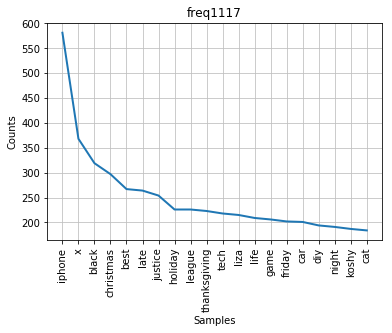

In [157]:
get_monthtrend_modified('11', '17', 'freq1117')


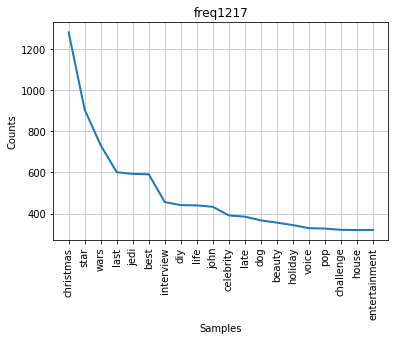

In [158]:
get_monthtrend_modified('12', '17','freq1217')

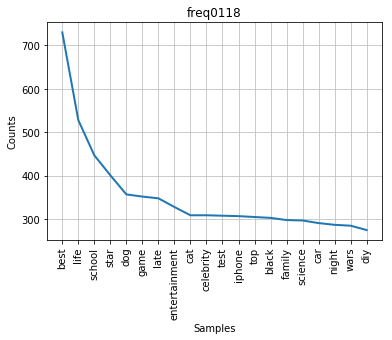

In [185]:
get_monthtrend_modified('01', '18', 'freq0118')

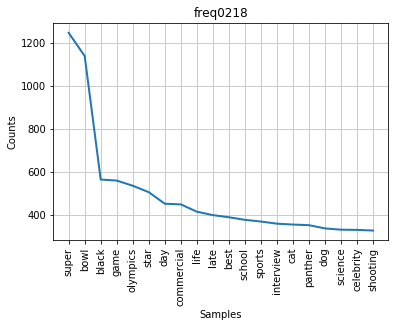

In [163]:
get_monthtrend_modified('02', '18','freq0218')

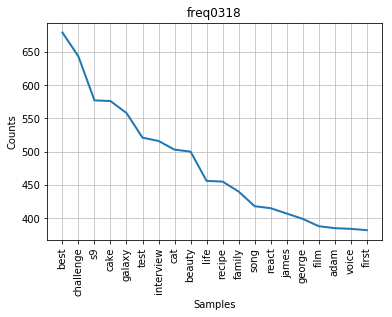

In [162]:
get_monthtrend_modified('03', '18','freq0318')

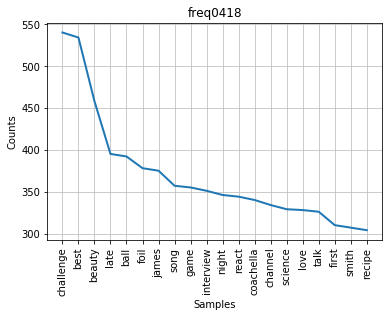

In [161]:
get_monthtrend_modified('04', '18','freq0418')

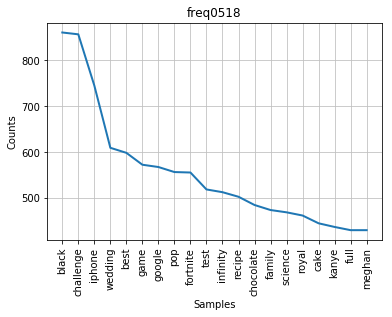

In [160]:
get_monthtrend_modified('05', '18','freq0518')

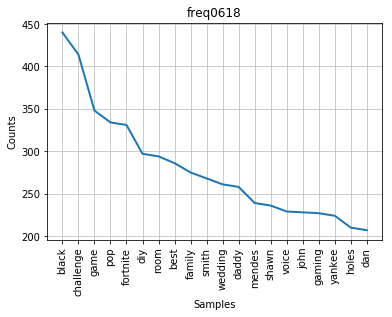

In [159]:
get_monthtrend_modified('06', '18','freq0618')